In [1]:
import pytest
import numpy as np

import utils as tu
import gefera as gf
import matplotlib.pyplot as plt

In [2]:
tu.random_args_conf()

{'a1': 7.9833735166001,
 't1': 9.05294809825185,
 'e1': 0.8679733279350279,
 'p1': 2.102227245818666,
 'w1': 3.722843530777607,
 'i1': 1.546449395519815,
 'a2': 2.972852113224971,
 't2': -9.774758871558504,
 'e2': 0.3627953778519599,
 'p2': 20.64100594594229,
 'o2': 4.890647143489189,
 'w2': 2.2637504404363353,
 'i2': 0.537579299025001}

In [98]:
d = np.array(tu.random_args_conf(dictionary=False))
t = np.linspace(0, np.max([d[3], d[9]]), 10)
dx = 1e-8

o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
sys = gf.ConfocalSystem(o1, o2)

bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)
dbp_fd = np.zeros_like(dbp)
dbpm_fd = np.zeros_like(dbpm)
dtheta_fd = np.zeros_like(dtheta)

for i in range(len(d)):
    d[i] += dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_plus = gf.ConfocalSystem(o1, o2)
    
    d[i] -= 2 * dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_minus = gf.ConfocalSystem(o1, o2)
    
    bp_plus, bpm_plus, theta_plus = sys_plus.impacts(t)
    bp_minus, bpm_minus, theta_minus = sys_minus.impacts(t)
    
    dbp_fd[i, :] = (bp_plus - bp_minus) / (2 * dx)
    dbpm_fd[i, :] = (bpm_plus - bpm_minus) / (2 * dx)
    dtheta_fd[i, :] = (theta_plus - theta_minus) / (2 * dx)
    
    assert np.all(np.isclose(dbp[i], dbp_fd[i], atol=1e-3))
    assert np.all(np.isclose(dbpm[i], dbpm_fd[i], atol=1e-3))
    assert np.all(np.isclose(dtheta[i], dtheta_fd[i], atol=1e-3))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


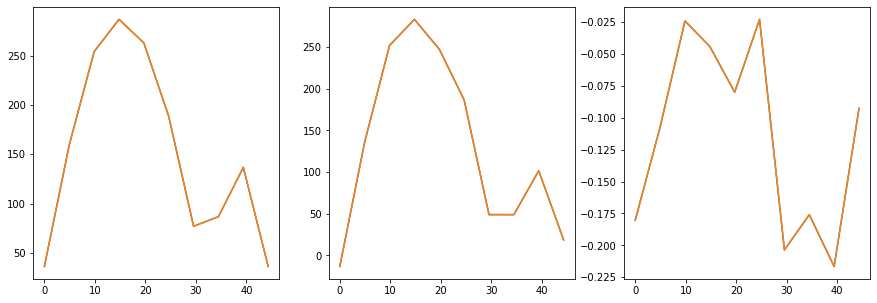

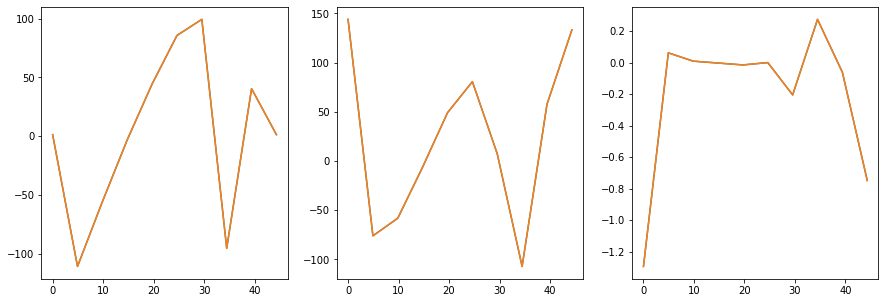

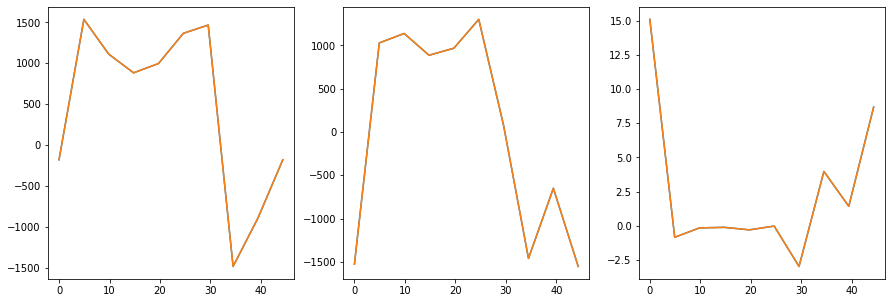

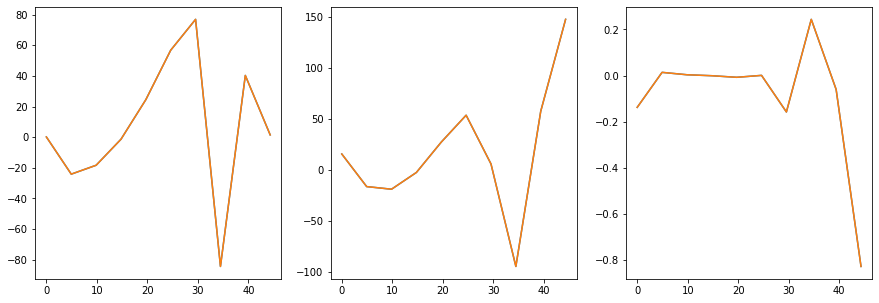

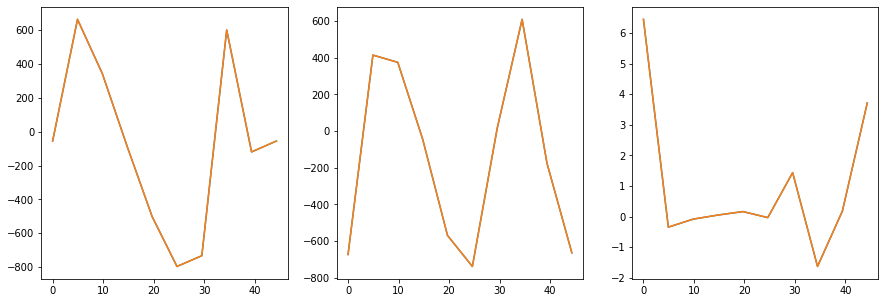

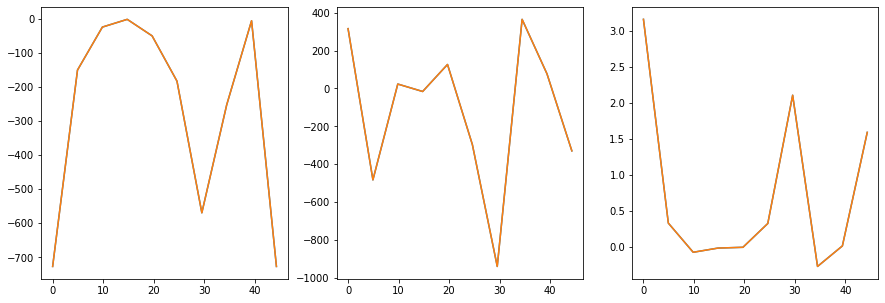

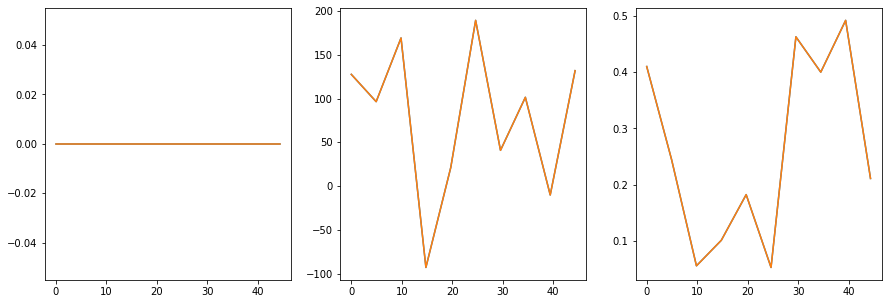

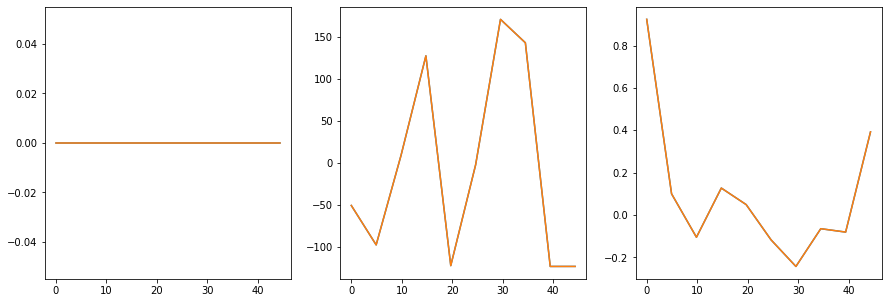

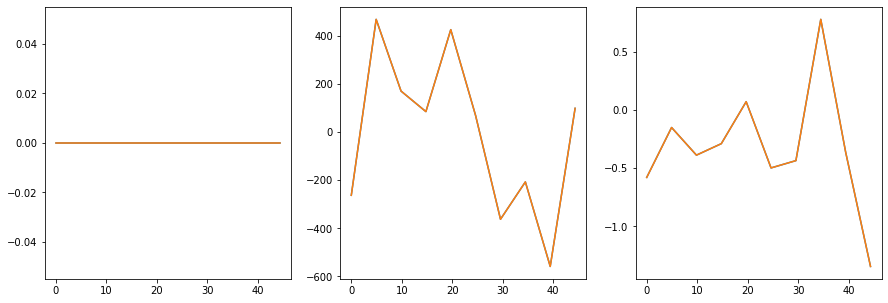

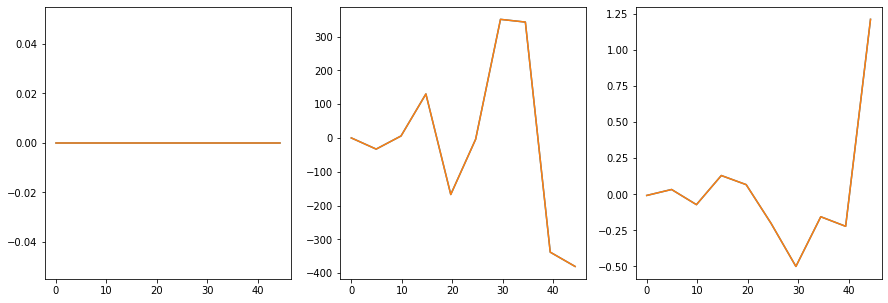

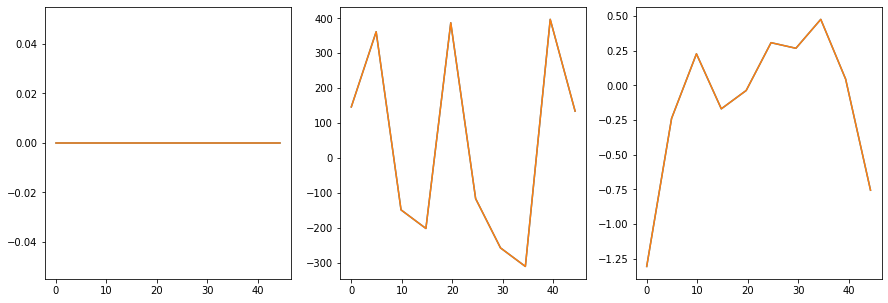

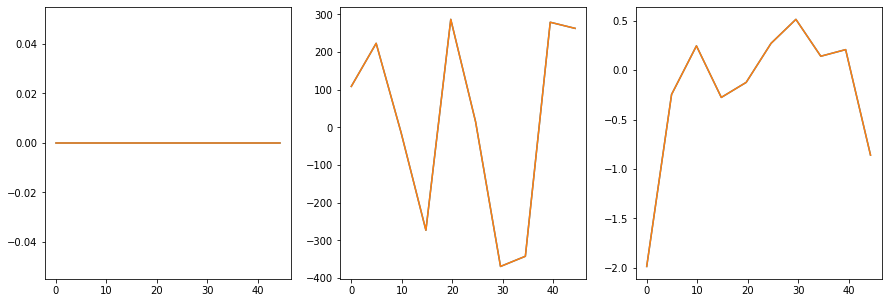

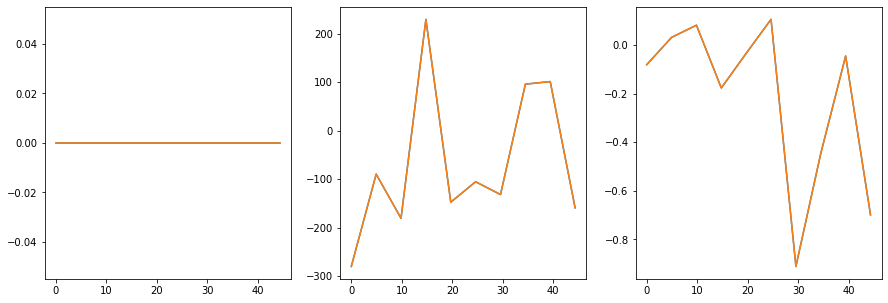

In [95]:
for i in range(len(d)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, dbp[i])
    axs[0].plot(t, dbp_fd[i])
    axs[1].plot(t, dbpm[i])
    axs[1].plot(t, dbpm_fd[i])
    axs[2].plot(t, dtheta[i])
    axs[2].plot(t, dtheta_fd[i])

In [ ]:
plt.plot(t, dtheta[3])